In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [2]:
iris = load_iris()
x = iris.data[iris.target != 0]
y = iris.target[iris.target != 0] - 1


In [3]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
x_n = pca_model.fit_transform(x)

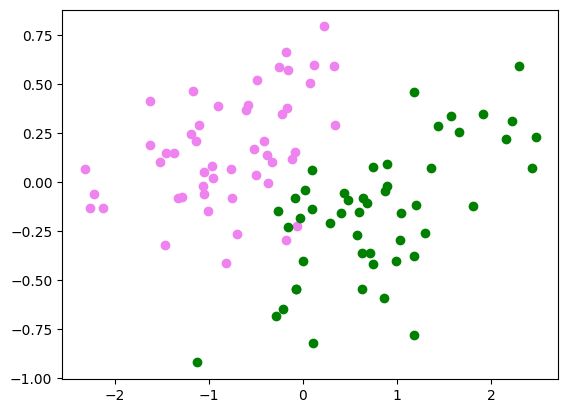

In [4]:
plt.scatter(x_n[y == 0, 0], x_n[y == 0, 1], c='violet')
plt.scatter(x_n[y == 1, 0], x_n[y == 1, 1], c='green')
plt.show()

In [12]:
w = np.array((0.1, 0.2, 0.3, 0.4)).reshape(4, 1)
b = 0
learning_rate = 0.01
n_iterations = 3000

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(x, w, b):
    return sigmoid(np.dot(x, w) + b)

def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def compute_accuracy(y, y_pred):
    predictions = (y_pred >= 0.5).astype(int)
    print(predictions != y)
    accuracy = (predictions == y)
    
    return accuracy

for iteration in range(n_iterations):
    idx = np.random.randint(len(x))
    X_i = x[idx:idx+1]
    y_i = y[idx:idx+1]
    
    y_pred = predict(X_i, w, b)
    error = y_pred - y_i

    gradient_w = X_i * error
    gradient_b = error

    w -= (learning_rate * gradient_w).T
    b -= learning_rate * gradient_b

    if iteration % 10 == 0:
        y_pred_all = predict(x, w, b)
        accuracy = compute_accuracy(y, y_pred_all)
        print(f"Iteration {iteration}, Loss: , Accuracy: {accuracy}")


[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]
Iteration 0, Loss: , Accuracy: [[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]
[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]
Iteration 10, Loss: , Accuracy: [[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False Fal

In [14]:
df = pd.DataFrame(np.hstack((x, y.reshape(-1, 1), predict(x, w, b).reshape(-1, 1))))
df.tail()

,0,1,2,3,4,5
95,6.7,3.0,5.2,2.3,1.0,0.757103
96,6.3,2.5,5.0,1.9,1.0,0.738339
97,6.5,3.0,5.2,2.0,1.0,0.696338
98,6.2,3.4,5.4,2.3,1.0,0.869585
99,5.9,3.0,5.1,1.8,1.0,0.757156


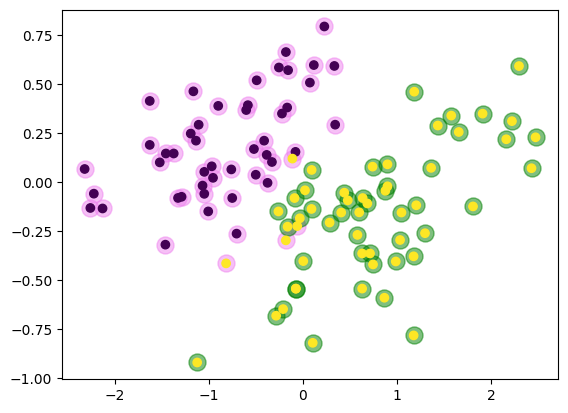

In [23]:
pred_all = (predict(x, w, b) >= 0.5).astype(int)
plt.scatter(x_n[y == 0, 0], x_n[y == 0, 1], c='violet', s=150, alpha=0.5)
plt.scatter(x_n[y == 1, 0], x_n[y == 1, 1], c='green', s=150, alpha=0.5)
plt.scatter(x_n[:, 0], x_n[:, 1], c=pred_all)
plt.show()